# LimpiezaEDA.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Separamos es Dataset original en el csv de entrenamiento y el csv de test

## Limpieza de datos.

In [52]:
# Creo el Dataframe con los datos del csv de "coches_train.csv"
df = pd.read_csv("../data/raw/coches-de-segunda-mano-sample.csv")
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


Las variables predictoras que quiero usar son:
- Marca del vehículo.
- Modelo del vehículo.
- Tipo de combustible.
- Año.
- Kilómetros.
- Potencia.
- Tipo de transmisión.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

In [42]:
df.describe()

,price,price_financed,year,kms,power,doors,photos
count,50000.000000,23563.000000,49998.000000,5.000000e+04,41472.000000,50000.000000,50000.000000
mean,15166.270260,18480.029283,2012.311032,1.163591e+05,146.396388,4.505380,16.199120
std,16485.669747,13389.800738,6.677760,1.072921e+05,71.283964,0.868001,12.422882
min,300.000000,700.000000,1970.000000,0.000000e+00,29.000000,2.000000,0.000000
25%,5500.000000,10790.000000,2007.000000,3.830000e+04,109.000000,4.000000,7.000000
50%,11750.000000,15500.000000,2015.000000,9.999900e+04,130.000000,5.000000,13.000000
75%,19800.000000,21995.000000,2018.000000,1.749000e+05,163.000000,5.000000,23.000000
max,549900.000000,428999.000000,2021.000000,5.000000e+06,800.000000,5.000000,54.000000


In [53]:
from sklearn.preprocessing import LabelEncoder

# Elimino la columna de precio financiado para evitar perdida de registros al limpiar los "Nan"
df = df.drop(columns="price_financed")
# Creo la columna antiquity para saber los años de antiguedad del coche
df["antiquity"] = 2023 - df["year"]
# Combierto la columna marca a numerica por frecuencia.
le = LabelEncoder()
df['num_make'] = le.fit_transform(df['make'])

In [54]:
df_marcas = pd.get_dummies(df['make'], prefix='make')
df = pd.concat([df, df_marcas], axis=1)

In [70]:
df["fuel"].unique()

array(['Gasolina', 'Diésel', 'Híbrido enchufable', 'Eléctrico',
       'Gas natural (CNG)', 'Híbrido', 'Gas licuado (GLP)'], dtype=object)

In [71]:
df_fuel = pd.get_dummies(df['fuel'], prefix='fuel')
df = pd.concat([df, df_fuel], axis=1)

In [55]:
df.head()

,url,company,make,model,version,price,fuel,year,kms,power,...,make_SSANGYONG,make_SUBARU,make_SUZUKI,make_TATA,make_TESLA,make_TOYOTA,make_UMM,make_VAZ,make_VOLKSWAGEN,make_VOLVO
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,Diésel,2000.0,227000,NaN,...,False,False,False,False,False,False,False,False,False,False
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,Gasolina,2017.0,50071,82.0,...,False,False,False,False,False,False,False,False,False,False
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,Diésel,2016.0,103000,100.0,...,False,False,False,False,False,False,False,False,False,False
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,Diésel,2014.0,120000,140.0,...,False,False,False,False,False,False,False,False,True,False
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,Diésel,2017.0,107000,130.0,...,False,False,False,False,False,False,False,False,False,False


In [56]:
# ELIMINO LAS COLUMNAS QUE NO NECESITO.
df = df.drop(columns=["url", "company",
                       "photos", "is_professional",
                         "dealer", "province", "country",
                           "publish_date", "insert_date"])

In [57]:
# ELIMINO LOS NaN.
df = df.dropna()

<Axes: xlabel='price'>

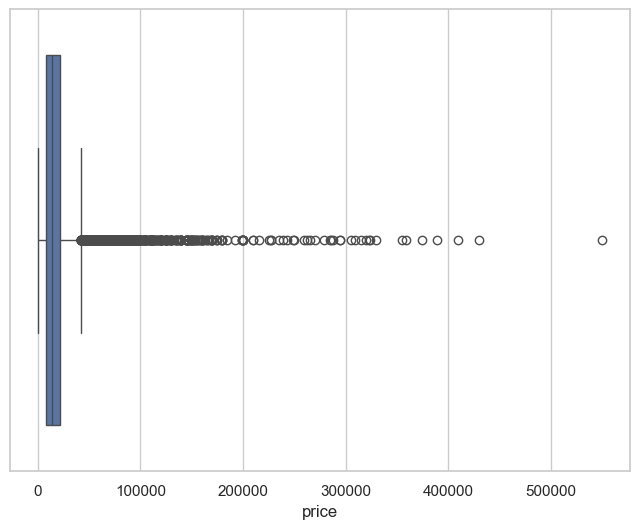

In [58]:
# VISUALIZO EN UN GRAFICO DE CAJA LOS OUTLIERS.
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["price"])

In [59]:
coches_lujo = df['price'] > 40000
df_lujo = df[coches_lujo]
df = df.drop(df[coches_lujo].index)
df_lujo


,make,model,version,price,fuel,year,kms,power,doors,shift,...,make_SSANGYONG,make_SUBARU,make_SUZUKI,make_TATA,make_TESLA,make_TOYOTA,make_UMM,make_VAZ,make_VOLKSWAGEN,make_VOLVO
59,MERCEDES-BENZ,Clase V,MERCEDES-BENZ Clase V 220 d Clase V Largo 4p.,44097,Diésel,2019.0,24429,163.0,4,Automático,...,False,False,False,False,False,False,False,False,False,False
68,MERCEDES-BENZ,GLC Coupé,MERCEDES-BENZ GLC Coupe GLC 220 d 4MATIC 5p.,49900,Diésel,2019.0,200,170.0,5,Automático,...,False,False,False,False,False,False,False,False,False,False
78,BMW,Serie 2,BMW Serie 2 M2 2p.,48200,Gasolina,2017.0,8000,370.0,2,Automático,...,False,False,False,False,False,False,False,False,False,False
90,MERCEDES-BENZ,CLA,MERCEDES-BENZ CLA CLA 200 D DCT 4p.,44600,Diésel,2021.0,0,150.0,4,Manual,...,False,False,False,False,False,False,False,False,False,False
99,LAND-ROVER,Discovery Sport,LAND-ROVER Discovery Sport 2.0D I4L.Flw 150 PS...,60190,Diésel,2019.0,0,150.0,5,Automático,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49906,VOLVO,XC60,VOLVO XC60 2.0 T6 AWD Inscription Auto 5p.,44900,Gasolina,2017.0,26232,310.0,5,Automático,...,False,False,False,False,False,False,False,False,False,True
49934,PORSCHE,Macan,PORSCHE Macan S Diesel 5p.,41990,Diésel,2015.0,81000,258.0,5,Automático,...,False,False,False,False,False,False,False,False,False,False
49963,MERCEDES-BENZ,Clase G,MERCEDES-BENZ Clase G G 350 d 5p.,81995,Diésel,2018.0,54000,245.0,5,Automático,...,False,False,False,False,False,False,False,False,False,False
49991,PORSCHE,911,PORSCHE 911 Turbo Coupe A.M.08 2p.,67900,Gasolina,2008.0,99000,480.0,2,Automático,...,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='price'>

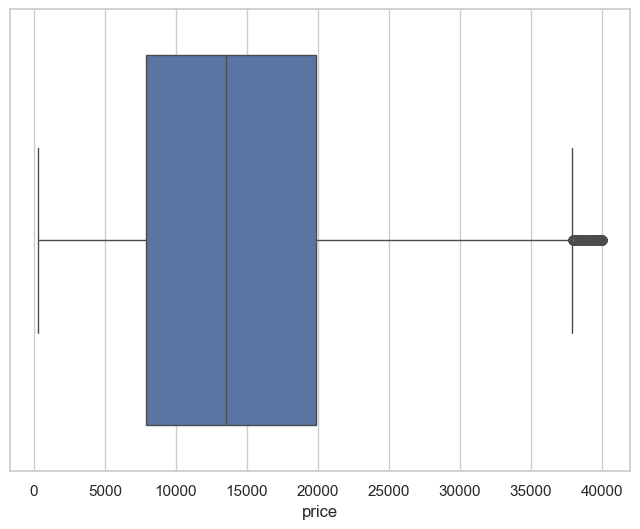

In [60]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["price"])

In [67]:
df["doors"] = df["doors"].replace(5, 4)
df["doors"] = df["doors"].replace(3, 2)
df["doors"].unique()

array([4, 2], dtype=int64)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38972 entries, 1 to 49999
Data columns (total 95 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make                     38972 non-null  object 
 1   model                    38972 non-null  object 
 2   version                  38972 non-null  object 
 3   price                    38972 non-null  int64  
 4   fuel                     38972 non-null  object 
 5   year                     38972 non-null  float64
 6   kms                      38972 non-null  int64  
 7   power                    38972 non-null  float64
 8   doors                    38972 non-null  int64  
 9   shift                    38972 non-null  object 
 10  color                    38972 non-null  object 
 11  antiquity                38972 non-null  float64
 12  num_make                 38972 non-null  int32  
 13  make_ABARTH              38972 non-null  bool   
 14  make_ALFA ROMEO          38

<Axes: >

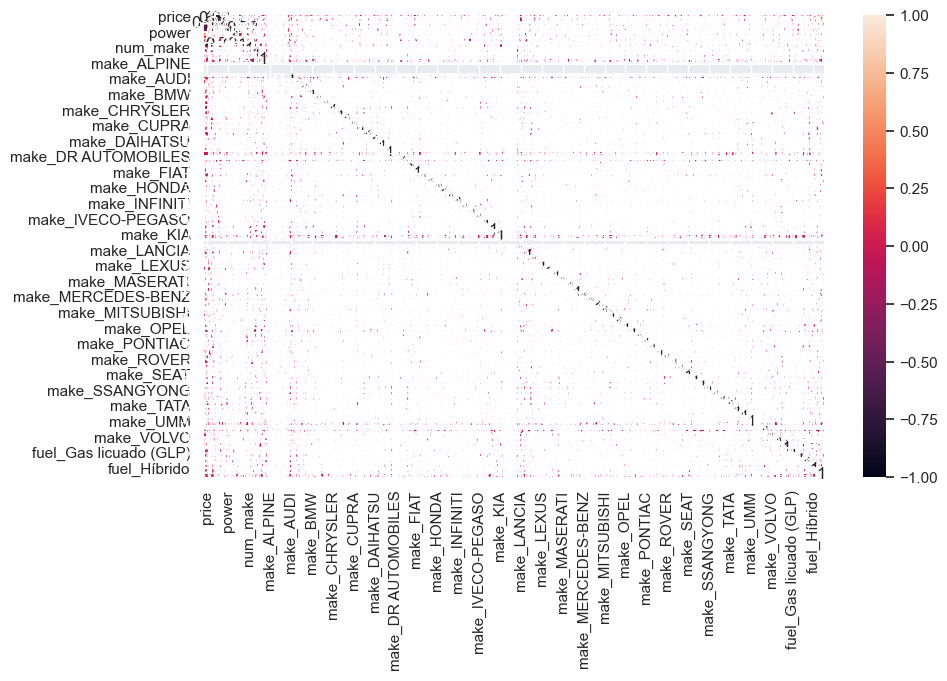

In [75]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.heatmap(df.drop(columns=["make", "model", "version", "fuel", "shift", "color"]).corr(), annot= True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38972 entries, 1 to 49999
Data columns (total 95 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make                     38972 non-null  object 
 1   model                    38972 non-null  object 
 2   version                  38972 non-null  object 
 3   price                    38972 non-null  int64  
 4   fuel                     38972 non-null  object 
 5   year                     38972 non-null  float64
 6   kms                      38972 non-null  int64  
 7   power                    38972 non-null  float64
 8   doors                    38972 non-null  int64  
 9   shift                    38972 non-null  object 
 10  color                    38972 non-null  object 
 11  antiquity                38972 non-null  float64
 12  num_make                 38972 non-null  int32  
 13  make_ABARTH              38972 non-null  bool   
 14  make_ALFA ROMEO          38

In [77]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Guardar los DataFrames resultantes en archivos CSV separados
train_df.to_csv("../data/train/coches_train.csv", index=False)
test_df.to_csv("../data/test/coches_test.csv", index=False)